Found 162 images belonging to 2 classes.
Found 2074 images belonging to 2 classes.
Number of training samples: 162
Number of validation samples: 2074


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 8s/step - accuracy: 0.5051 - loss: 3.3211 - val_accuracy: 0.9707 - val_loss: 0.1730
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.5625 - loss: 1.0526 - val_accuracy: 0.9702 - val_loss: 0.5740
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 56s 8s/step - accuracy: 0.5100 - loss: 0.7125 - val_accuracy: 0.0303 - val_loss: 1.2984
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.7188 - loss: 0.6202 - val_accuracy: 0.0293 - val_loss: 1.2307
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.6215 - loss: 0.6758 - val_accuracy: 0.0303 - val_loss: 0.8152
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 10s/step - accuracy: 0.6562 - loss: 0.6611 - val_accuracy: 0.0298 - val_loss: 0.7853
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.6550 - loss: 0.6710 - val_accuracy: 0.0342 - val_loss: 0.7358
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.6250 - loss: 0.6811 - val_accuracy: 0.0337 - val_loss: 0.7403
Epoch 

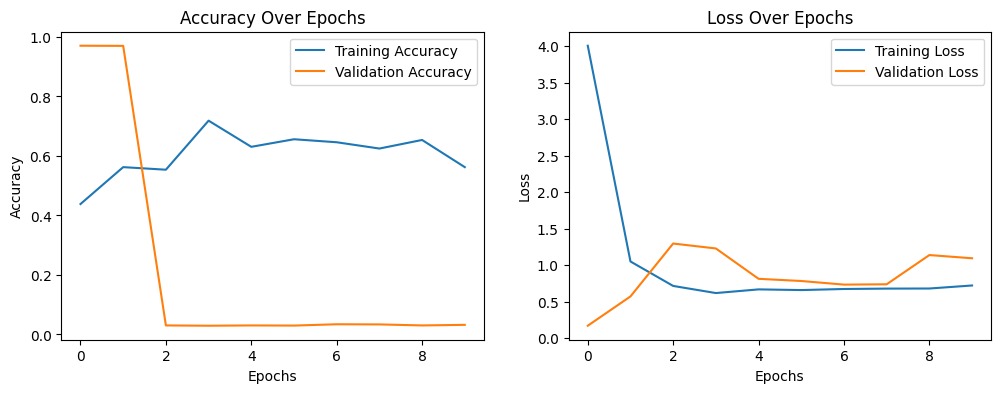

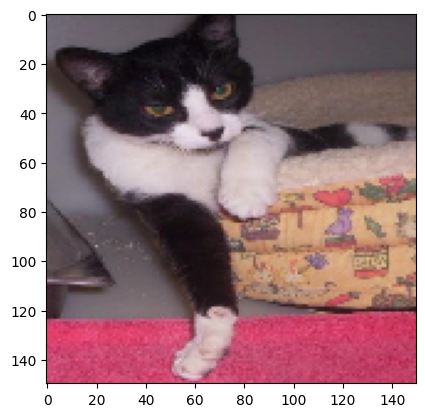

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Prediction: Cat


In [ ]:
# Step 1: Import required libraries
import os  # For file operations
from PIL import Image  # To handle image processing and check for corrupted files
import tensorflow as tf  # TensorFlow for building and training the CNN
from tensorflow.keras.models import Sequential  # Sequential model API
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  # CNN layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data preprocessing and augmentation
import matplotlib.pyplot as plt  # For visualizing training results

# Step 2: Define paths for training and validation directories
train_dir = '/content/train/train'  # Path to the training dataset
validation_dir = '/content/validation/validation'  # Path to the validation dataset

# Step 3: Function to remove corrupted or non-image files
def remove_corrupted_images(directory):
    """
    Remove non-image and corrupted files from the given directory.

    Parameters:
    - directory (str): Path to the dataset directory.

    This function ensures only valid image files (.jpg, .jpeg, .png, etc.)
    remain in the dataset, improving reliability during training.
    """
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
    for root, dirs, files in os.walk(directory):  # Traverse all files in the directory
        for file in files:
            file_path = os.path.join(root, file)
            if not file.lower().endswith(valid_extensions):  # Check for non-image files
                print(f"Removing non-image file: {file_path}")
                os.remove(file_path)
            else:
                try:
                    img = Image.open(file_path)
                    img.verify()  # Verify if the image can be opened
                except (IOError, SyntaxError):  # Handle corrupted images
                    print(f"Removing corrupted file: {file_path}")
                    os.remove(file_path)

# Step 4: Clean the training and validation directories
remove_corrupted_images(train_dir)
remove_corrupted_images(validation_dir)

# Step 5: Data Preprocessing
# Create an ImageDataGenerator with data augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to the range [0, 1]
    rotation_range=40,  # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Apply random shearing transformations
    zoom_range=0.2,  # Apply random zooming
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels after transformations
)

# Create an ImageDataGenerator for validation data (without augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values

# Load and preprocess the training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to the training directory
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,  # Number of images to process in a batch
    class_mode='binary'  # Binary classification (dog vs cat)
)

# Load and preprocess the validation dataset
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  # Path to the validation directory
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'
)

# Print the number of training and validation samples
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")

# Dynamically calculate steps per epoch and validation steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Step 6: Build the CNN model
model = Sequential([
    # First convolutional layer with max pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # 32 filters, 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),  # Downsample the feature map by 2x2 pooling

    # Second convolutional layer with max pooling
    Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps into a single 1D feature vector
    Flatten(),

    # Fully connected (dense) layer with ReLU activation
    Dense(128, activation='relu'),

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Display the model architecture
model.summary()

# Step 7: Compile the CNN
model.compile(
    optimizer='adam',  # Adam optimizer for efficient training
    loss='binary_crossentropy',  # Binary classification loss function
    metrics=['accuracy']  # Monitor accuracy during training
)

# Step 8: Train the CNN
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=steps_per_epoch,  # Dynamically calculated steps per epoch
    epochs=10,  # Number of training epochs
    validation_data=validation_generator,  # Validation data generator
    validation_steps=validation_steps  # Dynamically calculated validation steps
)

# Step 9: Visualize Training Results
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 10: Test the Model with a New Image
from tensorflow.keras.preprocessing import image
import numpy as np

# Replace 'test_image_path' with an image from your validation dataset
test_image_path = '/content/validation/validation/cats/9908.jpg'  # Example image path
test_img = image.load_img(test_image_path, target_size=(150, 150))  # Load and resize the image
plt.imshow(test_img)  # Display the test image
plt.show()

# Preprocess the test image
test_img_array = image.img_to_array(test_img)  # Convert the image to an array
test_img_array = np.expand_dims(test_img_array, axis=0)  # Add a batch dimension
test_img_array /= 255.0  # Normalize the image

# Predict the class of the test image
prediction = model.predict(test_img_array)
if prediction[0][0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")
